## SciPY 

est fait pour le calcule scientifique 
on trouve des modules pour les statestiques 
pour les operation algebrique...ect 

##  Interpolate

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

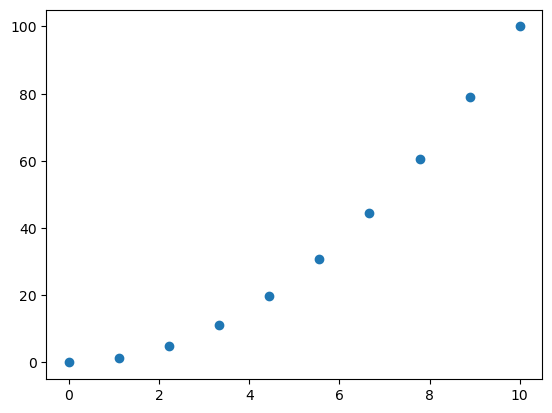

In [2]:
x = np.linspace (0, 10, 10)
y = x**2
plt.scatter(x, y)

In [3]:
from scipy.interpolate import interp1d


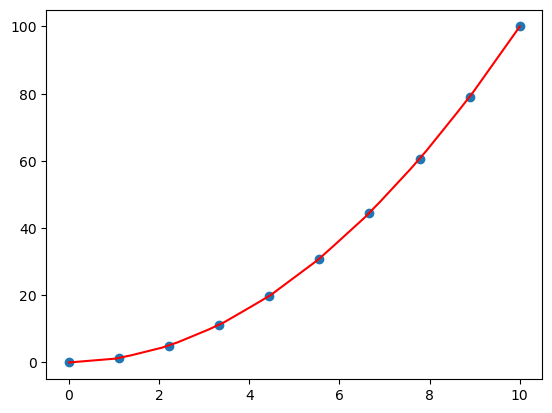

In [4]:

f = interp1d(x, y, kind ="linear")#permet de genere une autre fonction d'interpolation   
axx = np.linspace(0, 10, 30)
result = f(axx)

plt.scatter(x, y)
#plt.scatter(axx, result, c='r')
plt.plot(axx, result, c='r')

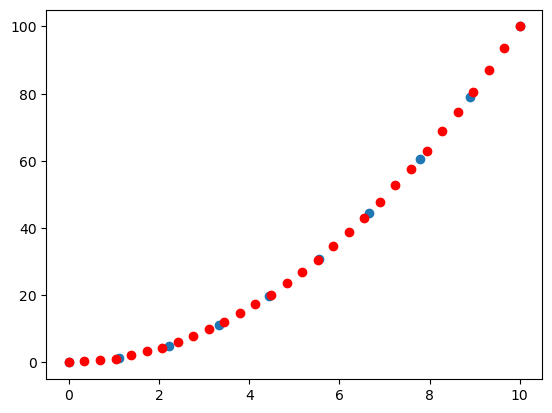

In [5]:

f = interp1d(x, y, kind ="linear")#permet de genere une autre fonction d'interpolation   
axx = np.linspace(0, 10, 30)
result = f(axx)

plt.scatter(x, y)
plt.scatter(axx, result, c='r')

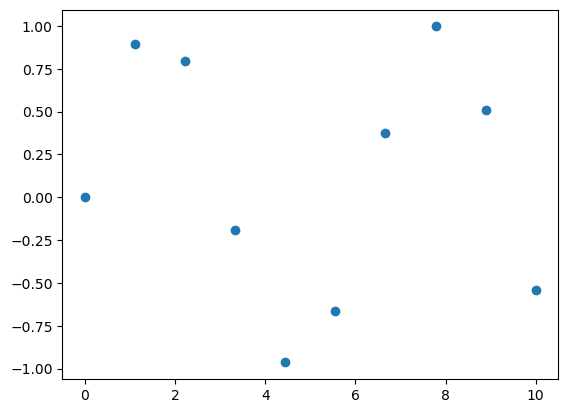

In [6]:
x = np.linspace (0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

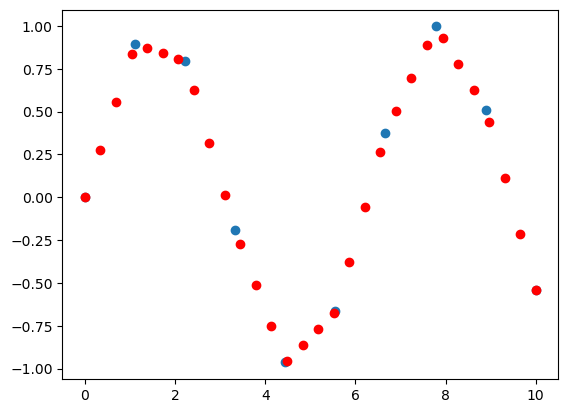

In [7]:
f = interp1d(x, y, kind ="linear")#permet de genere une autre fonction d'interpolation   
axx = np.linspace(0, 10, 30)
result = f(axx)

plt.scatter(x, y)
plt.scatter(axx, result, c='r')

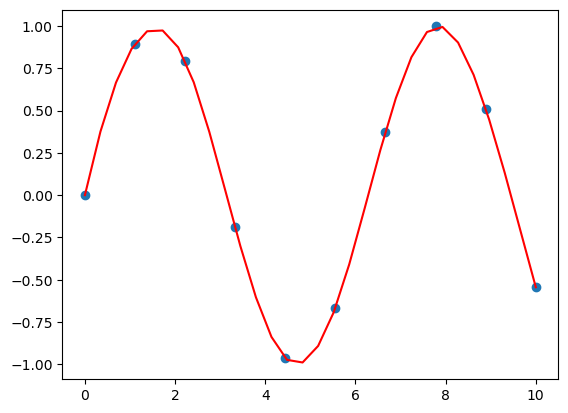

In [8]:
f = interp1d(x, y, kind ="cubic")#permet de genere une autre fonction d'interpolation   
axx = np.linspace(0, 10, 30)
result = f(axx)

plt.scatter(x, y)
#plt.scatter(axx, result, c='r')
plt.plot(axx, result, c='r')

## Optimize

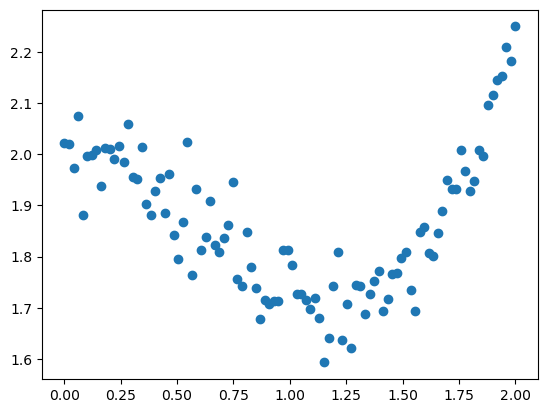

In [9]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [10]:
def f (x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d 

In [11]:
from scipy import optimize

In [12]:
params, params_cov = optimize.curve_fit(f , x, y)
params

array([ 0.3415189 , -0.62666089,  0.00756166,  2.00799873])

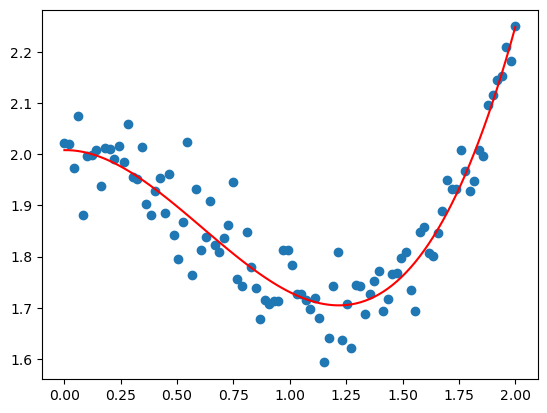

In [13]:
plt.scatter(x ,y)
plt.plot(x, f (x, params[0], params[1], params[2], params[3]) , c='r')

## Minimisation

In [14]:
def f (x):
    return x**2 + 15*np.sin(x)

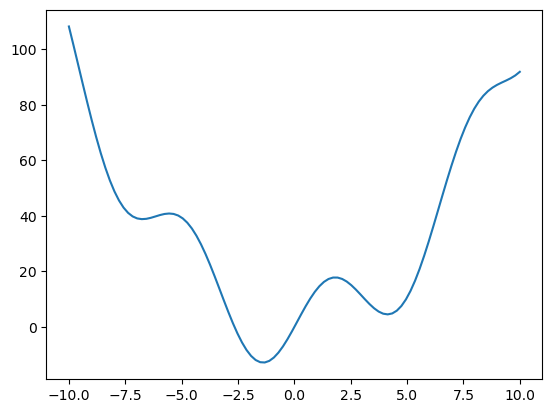

In [15]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [16]:
optimize.minimize(f, x0=-8)# ca c'est le minimume local

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 38.81120617595851
        x: [-6.738e+00]
      nit: 6
      jac: [ 4.768e-07]
 hess_inv: [[ 1.164e-01]]
     nfev: 14
     njev: 7

In [17]:
#le minimume global 
# dans le cas ou on veut l'enregistre 
x0 = -5
result = optimize.minimize(f, x0=x0).x

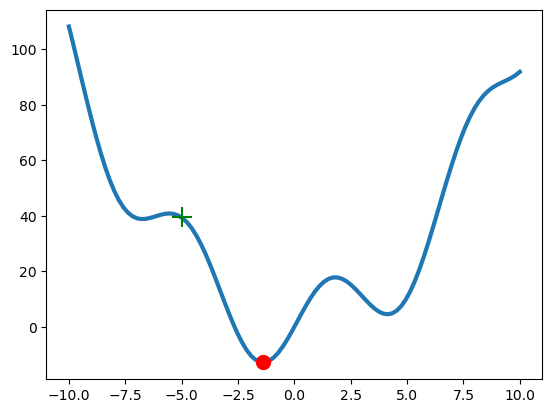

In [18]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter( x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()

In [19]:
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

[-0.78539917 -2.35619343]


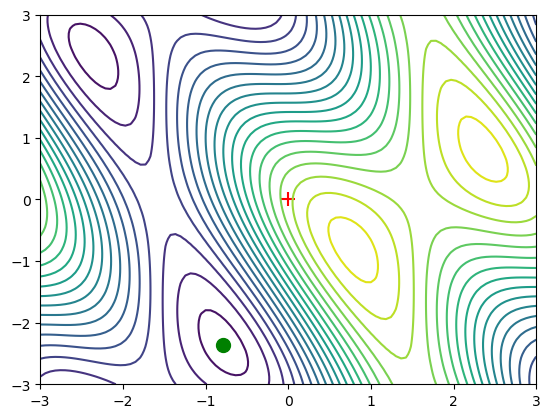

In [20]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x,y)
plt.contour(x, y, f(np.array([x, y])), 20)
x0= np.zeros((2))
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100)

result = optimize.minimize(f, x0=x0).x

plt.scatter(result[0], result[1], c='g', s=100)
print(result)

## Signal / FFT

## 3) Traitement du signal

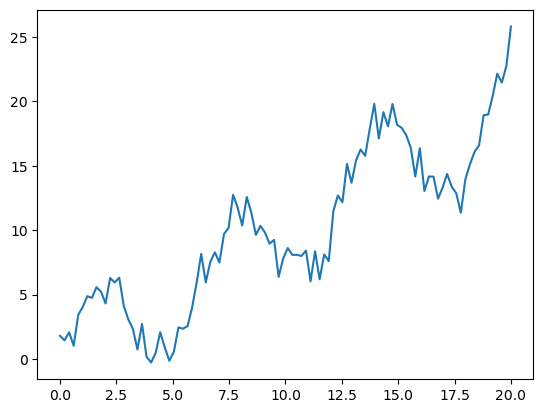

In [21]:
x = np.linspace(0, 20, 100)
np.random.seed(3)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

In [22]:
from scipy import signal

In [23]:
new_y = signal.detrend(y)

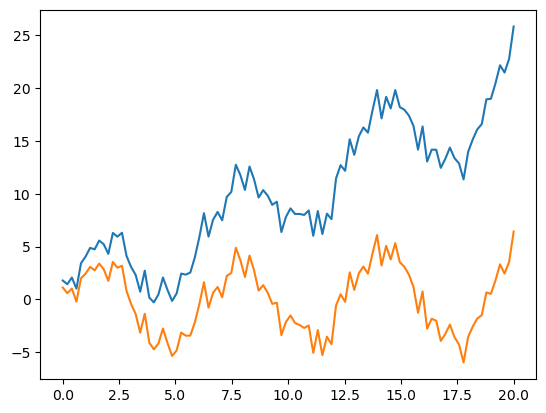

In [24]:
plt.plot(x, y)
plt.plot(x, new_y)

## Transformation de Fourier

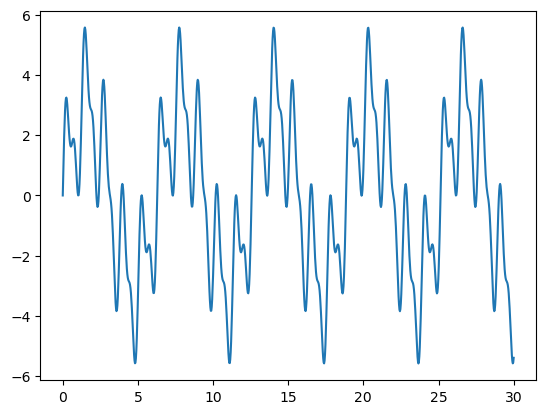

In [25]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [26]:
from scipy import fftpack

C:\Users\maiss\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


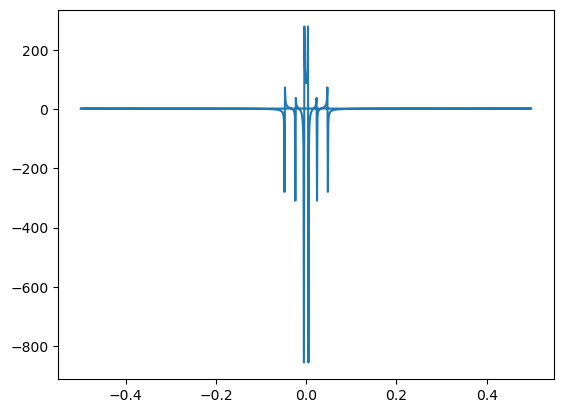

In [27]:
fourier = fftpack.fft(y)
frequence = fftpack.fftfreq(y.size)
plt.plot(frequence, fourier)

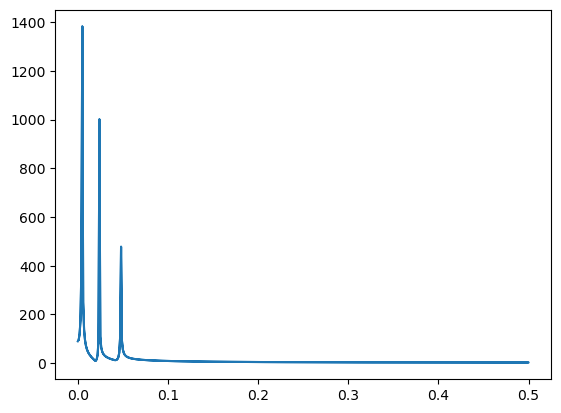

In [28]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequence), power)

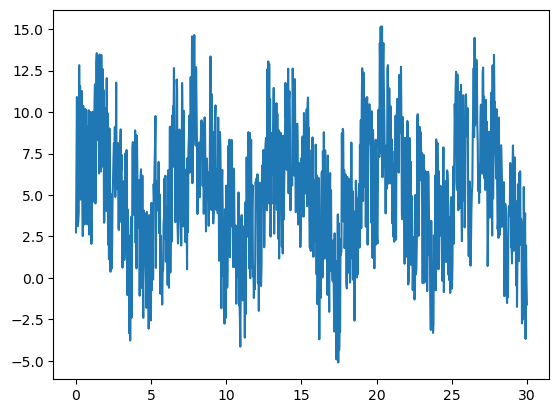

In [29]:
## SIGNAL
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

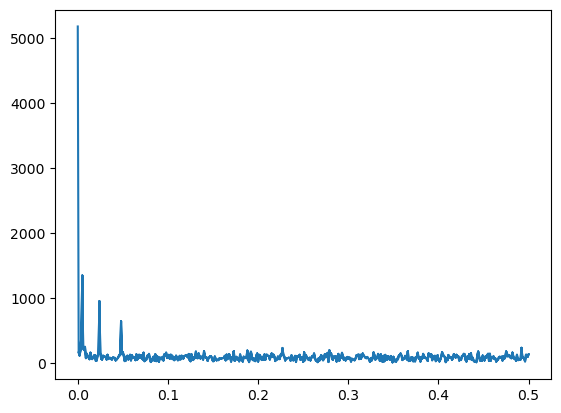

In [30]:
## SPECTRE
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequence), power)

In [31]:
fourier [power<400] = 0 

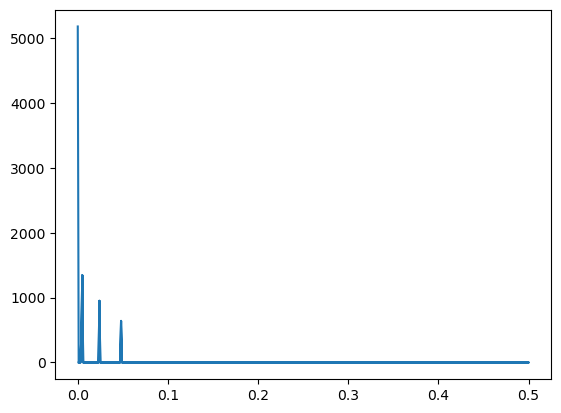

In [32]:
plt.plot(np.abs(frequence), np.abs(fourier))

In [33]:
filtered_signal = fftpack.ifft(fourier)

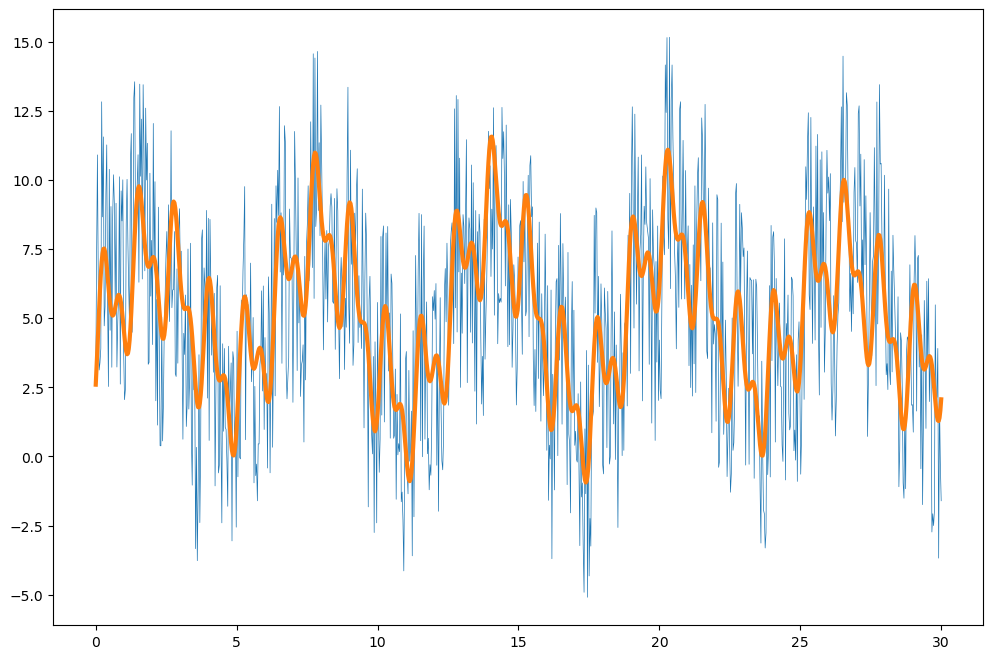

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5)
plt.plot(x, filtered_signal, lw=3)
plt.show()

## Traitement d'image

## nd image

## Morphology


In [35]:
from scipy import ndimage 

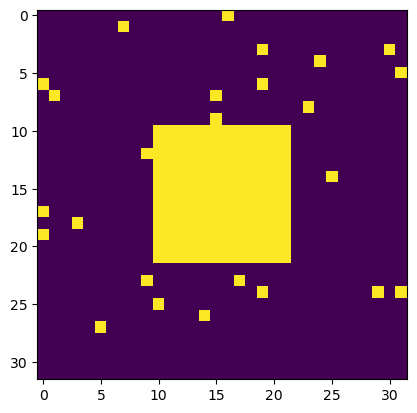

In [36]:
np.random.seed(0)
x = np.zeros((32,32))
x[10:-10, 10:-10] = 1
x[np.random.randint(0,32,30), np.random.randint(0, 32, 30)] = 1
plt.imshow(x)

Enlever les artifactes 

# Les artéfacts d'une image

Pour enlever les artéfacts d'une image, vous pouvez essayer plusieurs techniques de traitement d'image. L'approche spécifique dépend du type d'artéfacts que vous avez dans votre image. Voici quelques techniques générales que vous pourriez envisager :

Filtrage : Utilisez des filtres pour lisser l'image et réduire le bruit.

python
Copy code
from scipy.ndimage import gaussian_filter

# Appliquer un filtre gaussien pour lisser l'image


smoothed_image = gaussian_filter(image_matrix, sigma=1)


Ici, sigma contrôle l'intensité du lissage. Expérimentez avec différentes valeurs de sigma pour trouver celle qui fonctionne le mieux pour votre cas.

Morphologie mathématique : Utilisez des opérations morphologiques comme l'érosion et la dilatation pour éliminer les petits détails indésirables.

python
Copy code
from scipy.ndimage import binary_erosion, binary_dilation

# Appliquer l'érosion pour éliminer les petits détails
eroded_image = binary_erosion(bool_indexed_matrix, structure=np.ones((3, 3)))

# Appliquer la dilatation pour restaurer la forme de l'objet principal
dilated_image = binary_dilation(eroded_image, structure=np.ones((3, 3)))
Expérimentez avec la taille du noyau (structure) pour ajuster le niveau de détail que vous souhaitez conserver ou éliminer.

Filtrage médian : Utilisez un filtre médian pour supprimer le bruit sans perdre les bords nets.

python
Copy code
from scipy.ndimage import median_filter

# Appliquer un filtre médian pour éliminer le bruit
denoised_image = median_filter(image_matrix, size=3)
Ici, size est la taille du voisinage utilisé pour calculer la médiane.

Autres filtres : Explorez d'autres filtres disponibles dans les bibliothèques de traitement d'image, tels que uniform_filter ou maximum_filter, en fonction de la nature spécifique des artéfacts que vous avez.

Il est important de noter que le choix de la méthode dépendra de la nature des artéfacts dans votre image et de l'effet que vous souhaitez obtenir. Vous devrez peut-être expérimenter avec différentes techniques et paramètres pour trouver la meilleure approche pour votre cas particulier.







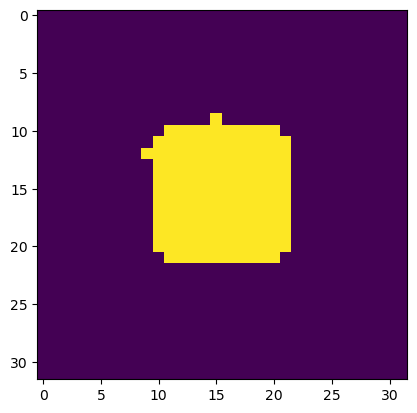

In [37]:
open_x = ndimage.binary_opening(x)
plt.imshow(open_x)

## Application dans une image de Bacterie 

In [38]:
# Copier la photo dans le répertoire actuel du notebook
import shutil
shutil.copy(r"C:\Users\maiss\OneDrive\Documents\IA\istockphoto_ndimage.jpg", ".")

'.\\istockphoto_ndimage.jpg'

(344, 612, 3)

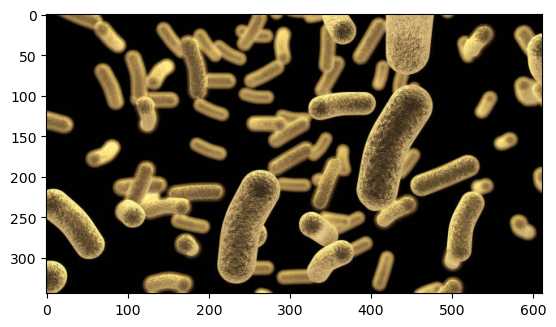

In [39]:
# Affichage de l'image 
image = plt.imread('istockphoto_ndimage.jpg')
#image = plt.imread('istockphoto_ndimage.jpg', format='gray')
#plt.imshow(image, cmap=plt.cm.gray)
image = image[:, :, ::-1]
plt.imshow(image)
image.shape

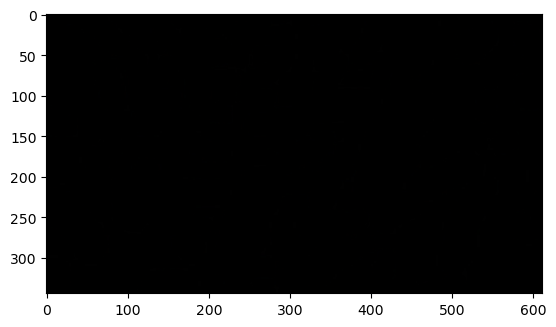

In [41]:
# Affichage de l'image 
image = plt.imread('istockphoto_ndimage.jpg')
#image = plt.imread('istockphoto_ndimage.jpg', format='gray')
#plt.imshow(image, cmap=plt.cm.gray)
image = image[:, :, ::-1]
plt.imshow(image)
image.shape


## Extraire l'image de fond 

In [ ]:
img = np.copy(image)
plt.hist(img.ravel(), bins=255)
plt.show()

In [ ]:
# Copier la photo dans le répertoire actuel du notebook
import shutil
shutil.copy(r"C:\Users\maiss\OneDrive\Documents\IA\botulisme-2.jpg", ".")

In [ ]:
# Affichage de l'image 
#image = plt.imread('botulisme-2.jpg')
image = plt.imread('botulisme-2.jpg', format='gray')
plt.imshow(image, cmap=plt.cm.gray)
image = image[:, :, 0] # mage = image[:, :, ::-1] le -1 est pour inverser les couleur car en matplotlib le ver est inverser
plt.imshow(image)
image.shape

In [ ]:
img = np.copy(image)
plt.hist(img.ravel(), bins=255) # ravel() pour aplatire notre image 
plt.show()

In [ ]:
img 

In [ ]:
img = img  > 175
img
plt.imshow(img)

In [ ]:
open_x = ndimage.binary_opening(img)
plt.imshow(open_x)

In [ ]:
label_image , n_label = ndimage.label(open_x)
print(n_label)

In [ ]:
plt.imshow(label_image)

In [ ]:
saizes = ndimage.sum(open_x, label_image, range(n_label))
saizes
plt.scatter(range(n_label), saizes, c='orange')

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
image_matrix = image

# Définissez une condition pour le boolean indexing, par exemple, les pixels ayant une valeur supérieure à 210
condition = image_matrix > 210

# Appliquez le boolean indexing pour obtenir une nouvelle matrice de booléens
bool_indexed_matrix = np.zeros_like(image_matrix, dtype=bool)
bool_indexed_matrix[condition] = True

# Affichez l'image en utilisant le boolean indexing
plt.imshow(bool_indexed_matrix)
plt.title('Image avec Boolean Indexing')
plt.show()

In [ ]:
open_x = ndimage.binary_opening(condition)
plt.imshow(open_x)

# L'Image avec Boolean Indexing

# Définissez une condition pour le boolean indexing, par exemple, les pixels ayant une valeur supérieure à 210

condition = image_matrix > 210 

Création de la matrice conditionnelle :


bool_indexed_matrix = np.zeros_like(image_matrix, dtype=bool)


np.zeros_like(image_matrix, dtype=bool) crée une nouvelle matrice de la même forme que image_matrix remplie de zéros de type booléen (dtype=bool).
Application du boolean indexing :

bool_indexed_matrix[condition] = True

condition est la matrice de conditions que vous avez définie précédemment. Elle contient True là où la condition est satisfaite et False sinon.
L'opération bool_indexed_matrix[condition] = True assigne la valeur True seulement aux positions où condition est True dans la matrice bool_indexed_matrix, tandis que les autres positions restent à False.
Ainsi, après ces deux étapes, bool_indexed_matrix est une matrice de la même forme que image_matrix, mais elle contient des valeurs booléennes (True/False) en fonction de la condition spécifiée.

## En résumé
ce code utilise le boolean indexing pour créer une nouvelle matrice de booléens (bool_indexed_matrix) basée sur une condition appliquée à la matrice d'origine (image_matrix). Cela peut être utile pour effectuer des opérations ultérieures spécifiques aux pixels qui satisfont la condition. Dans le contexte de l'exemple, la condition est que la valeur du pixel doit être supérieure à 210.







In [ ]:
from scipy.ndimage import binary_erosion, binary_dilation

# Appliquer l'érosion pour éliminer les petits détails
eroded_image = binary_erosion(condition, structure=np.ones((3, 3)))

# Appliquer la dilatation pour restaurer la forme de l'objet principal
dilated_image = binary_dilation(eroded_image, structure=np.ones((3, 3)))

plt.imshow(dilated_image)

In [ ]:
label_image , n_label = ndimage.label(open_x)
print(n_label)

In [ ]:
plt.imshow(label_image)
saizes = ndimage.sum(open_x, label_image, range(n_label))
saizes

In [ ]:
saizes = ndimage.sum(open_x, label_image, range(n_label))
saizes

In [ ]:
plt.scatter(range(n_label), saizes, c='orange')

In [ ]:
## Bacteria 

In [ ]:
#IMPORTER L'IMAGE
# Copier la photo dans le répertoire actuel du notebook
import shutil
shutil.copy(r"C:\Users\maiss\OneDrive\Documents\IA\bacteria.png", ".")

In [ ]:
# Affichage de l'image 
image = plt.imread('bacteria.png')
#image = plt.imread('bacteria.png', format='gray')
#plt.imshow(image, cmap=plt.cm.gray)
#image = image[:, :,::-1] # mage = image[:, :, ::-1] le -1 est pour inverser les couleur car en matplotlib le ver est inverser
image = image[:, :, 0]
#image = image[:-1, :]
#plt.colorbar()
plt.imshow(image)
image.shape

In [ ]:
img = np.copy(image)
#img = (img * 255).astype(np.uint8)  # Normalisez les valeurs des pixels à l'échelle [0, 255]
plt.hist(img.ravel(), bins=255) # ravel() pour aplatire notre image 
plt.title("pixel intensities")
plt.xlabel(" les valeurs d'intensité des pixels")
plt.ylabel("le nombre de pixels pour chaque valeur d'intensité")
plt.show()

In [ ]:
img

In [ ]:
img = img  < 0.6
img
plt.imshow(img)

In [ ]:
open_x = ndimage.binary_opening(img)
plt.imshow(open_x)

In [ ]:
label_img , n_labels = ndimage.label(open_x)
n_labels

In [ ]:
plt.imshow(label_img)

# compter tout les pixel qu'il ya dans chaque groupe 
# avec la fonction sum de ndimage

In [ ]:
size = ndimage.sum(open_x, label_img, range(n_labels))

In [ ]:
size #il contien 52 element et pour chaque element on a sa taille dans size

In [ ]:
plt.scatter(range(n_labels), size, c="orange")
plt.title("size of elements")
plt.xlabel("element")
plt.ylabel("size")